<a href="https://colab.research.google.com/github/archuoff/Ml-models-2/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import datasets
data1= datasets.load_iris()
df=pd.DataFrame(data1.data, columns= data1.feature_names)
x = df.iloc[:, [0, 1, 2, 3]].values
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


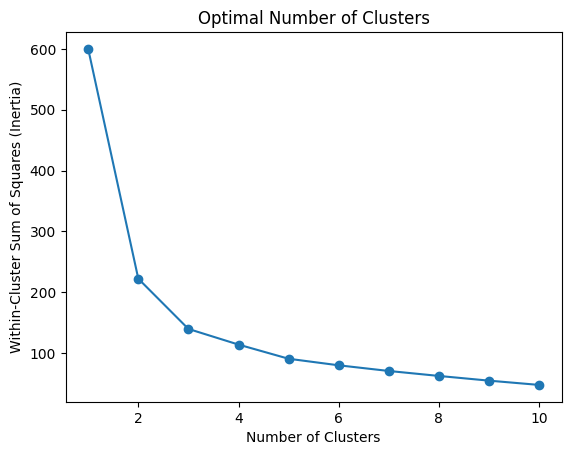

In [ ]:
iris=data1.data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sat=StandardScaler()
iris1=sat.fit_transform(iris)

inertia_values = []
possible_clusters = range(1, 11)

for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init = 10)
    kmeans.fit(iris1)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(possible_clusters, inertia_values, marker='o')
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

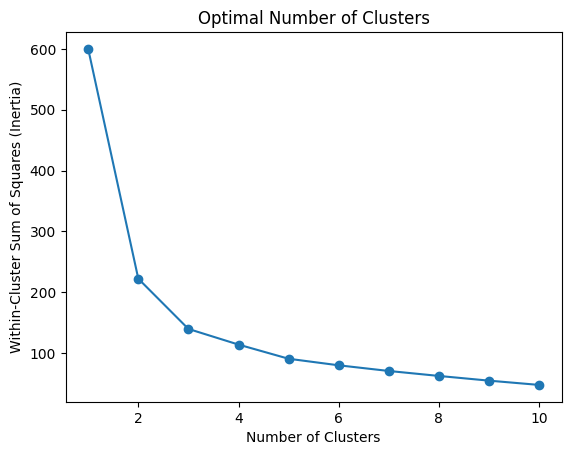

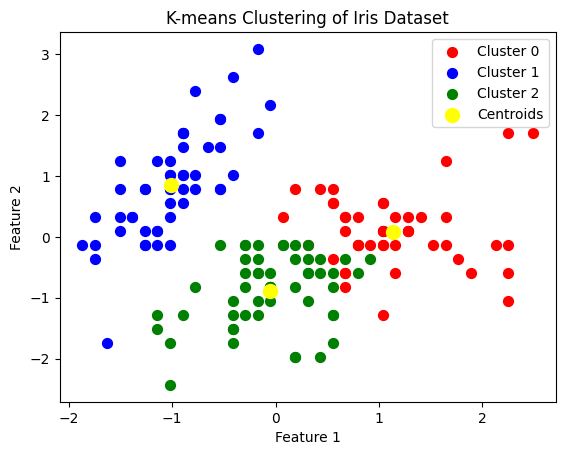

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming you have iris data
iris = data1.data

# Standardize the feature values
sat = StandardScaler()
iris1 = sat.fit_transform(iris)

inertia_values = []
possible_clusters = range(1, 11)

for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(iris1)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(possible_clusters, inertia_values, marker='o')
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

# Fit K-means with the optimal number of clusters
optimal_k = 3  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(iris1)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(iris1[df['Cluster'] == 0, 0], iris1[df['Cluster'] == 0, 1], s=50, c='red', label='Cluster 0')
plt.scatter(iris1[df['Cluster'] == 1, 0], iris1[df['Cluster'] == 1, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(iris1[df['Cluster'] == 2, 0], iris1[df['Cluster'] == 2, 1], s=50, c='green', label='Cluster 2')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
